### Home Prices - Multiple Linear Regression

We want to predict home prices for the test dataset. We will use a linear regression model since the dependent variable is quantitative.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statistics as st
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from itertools import product
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import statsmodels.api as sm
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from statsmodels.regression.linear_model import OLS
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
import pickle

In [2]:
# Load train dataset
df = pd.read_csv(r'C:\Users\paowm\Downloads\train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
# Print column names
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

We can check if any of the variables have null values and their data type.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

We have 80 variables in our dataset including the target variable SalePrice which is the variable we are looking to predict.

### 1. Exploratory Data Analysis

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Histograms - Univariate analysis

The histograms will help us study the behaviour of the data. These will tell us how the data points are distributed and if there is presence of outliers.

<AxesSubplot:xlabel='FullBath', ylabel='Count'>

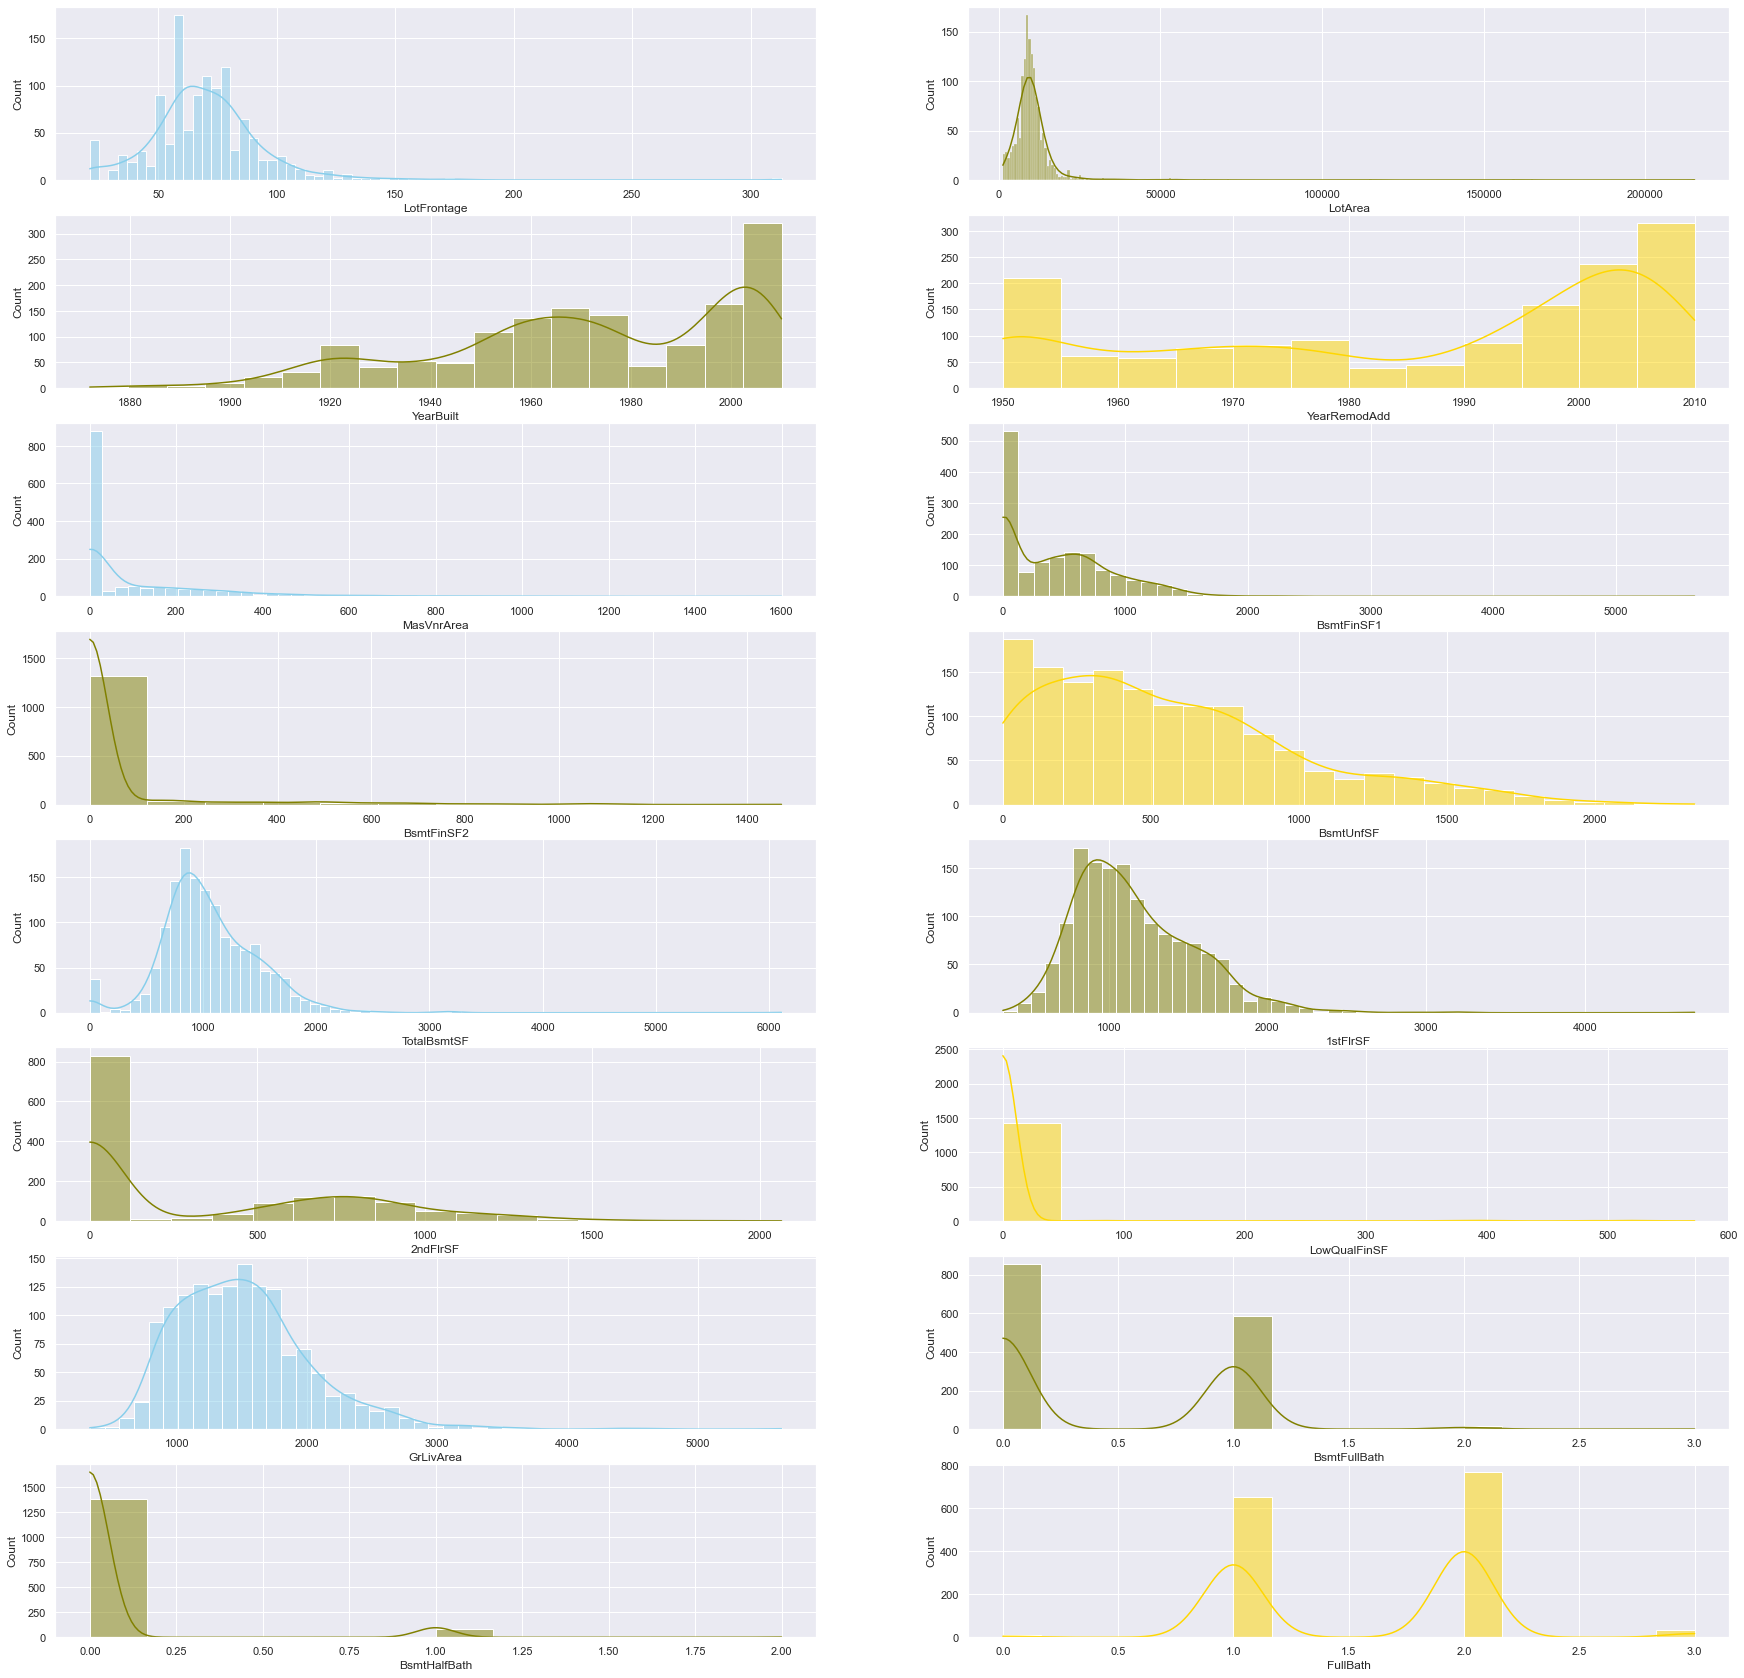

In [6]:
sns.set_theme(style="darkgrid")


fig, axs = plt.subplots(8, 2, figsize=(30, 30))

sns.histplot(data=df, x='LotFrontage', kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="LotArea", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="YearBuilt", kde=True, color="olive", ax=axs[1, 0])
sns.histplot(data=df, x="YearRemodAdd", kde=True, color="gold", ax=axs[1, 1])


sns.histplot(data=df, x='MasVnrArea', kde=True, color="skyblue", ax=axs[2, 0])
sns.histplot(data=df, x="BsmtFinSF2", kde=True, color="olive", ax=axs[3, 0])
sns.histplot(data=df, x="BsmtFinSF1", kde=True, color="olive", ax=axs[2, 1])
sns.histplot(data=df, x="BsmtUnfSF", kde=True, color="gold", ax=axs[3, 1])

sns.histplot(data=df, x='TotalBsmtSF', kde=True, color="skyblue", ax=axs[4, 0])
sns.histplot(data=df, x="1stFlrSF", kde=True, color="olive", ax=axs[4, 1])
sns.histplot(data=df, x="2ndFlrSF", kde=True, color="olive", ax=axs[5, 0])
sns.histplot(data=df, x="LowQualFinSF", kde=True, color="gold", ax=axs[5, 1])

sns.histplot(data=df, x='GrLivArea', kde=True, color="skyblue", ax=axs[6, 0])
sns.histplot(data=df, x="BsmtFullBath", kde=True, color="olive", ax=axs[6, 1])
sns.histplot(data=df, x="BsmtHalfBath", kde=True, color="olive", ax=axs[7, 0])
sns.histplot(data=df, x="FullBath", kde=True, color="gold", ax=axs[7, 1])

<AxesSubplot:xlabel='YrSold', ylabel='Count'>

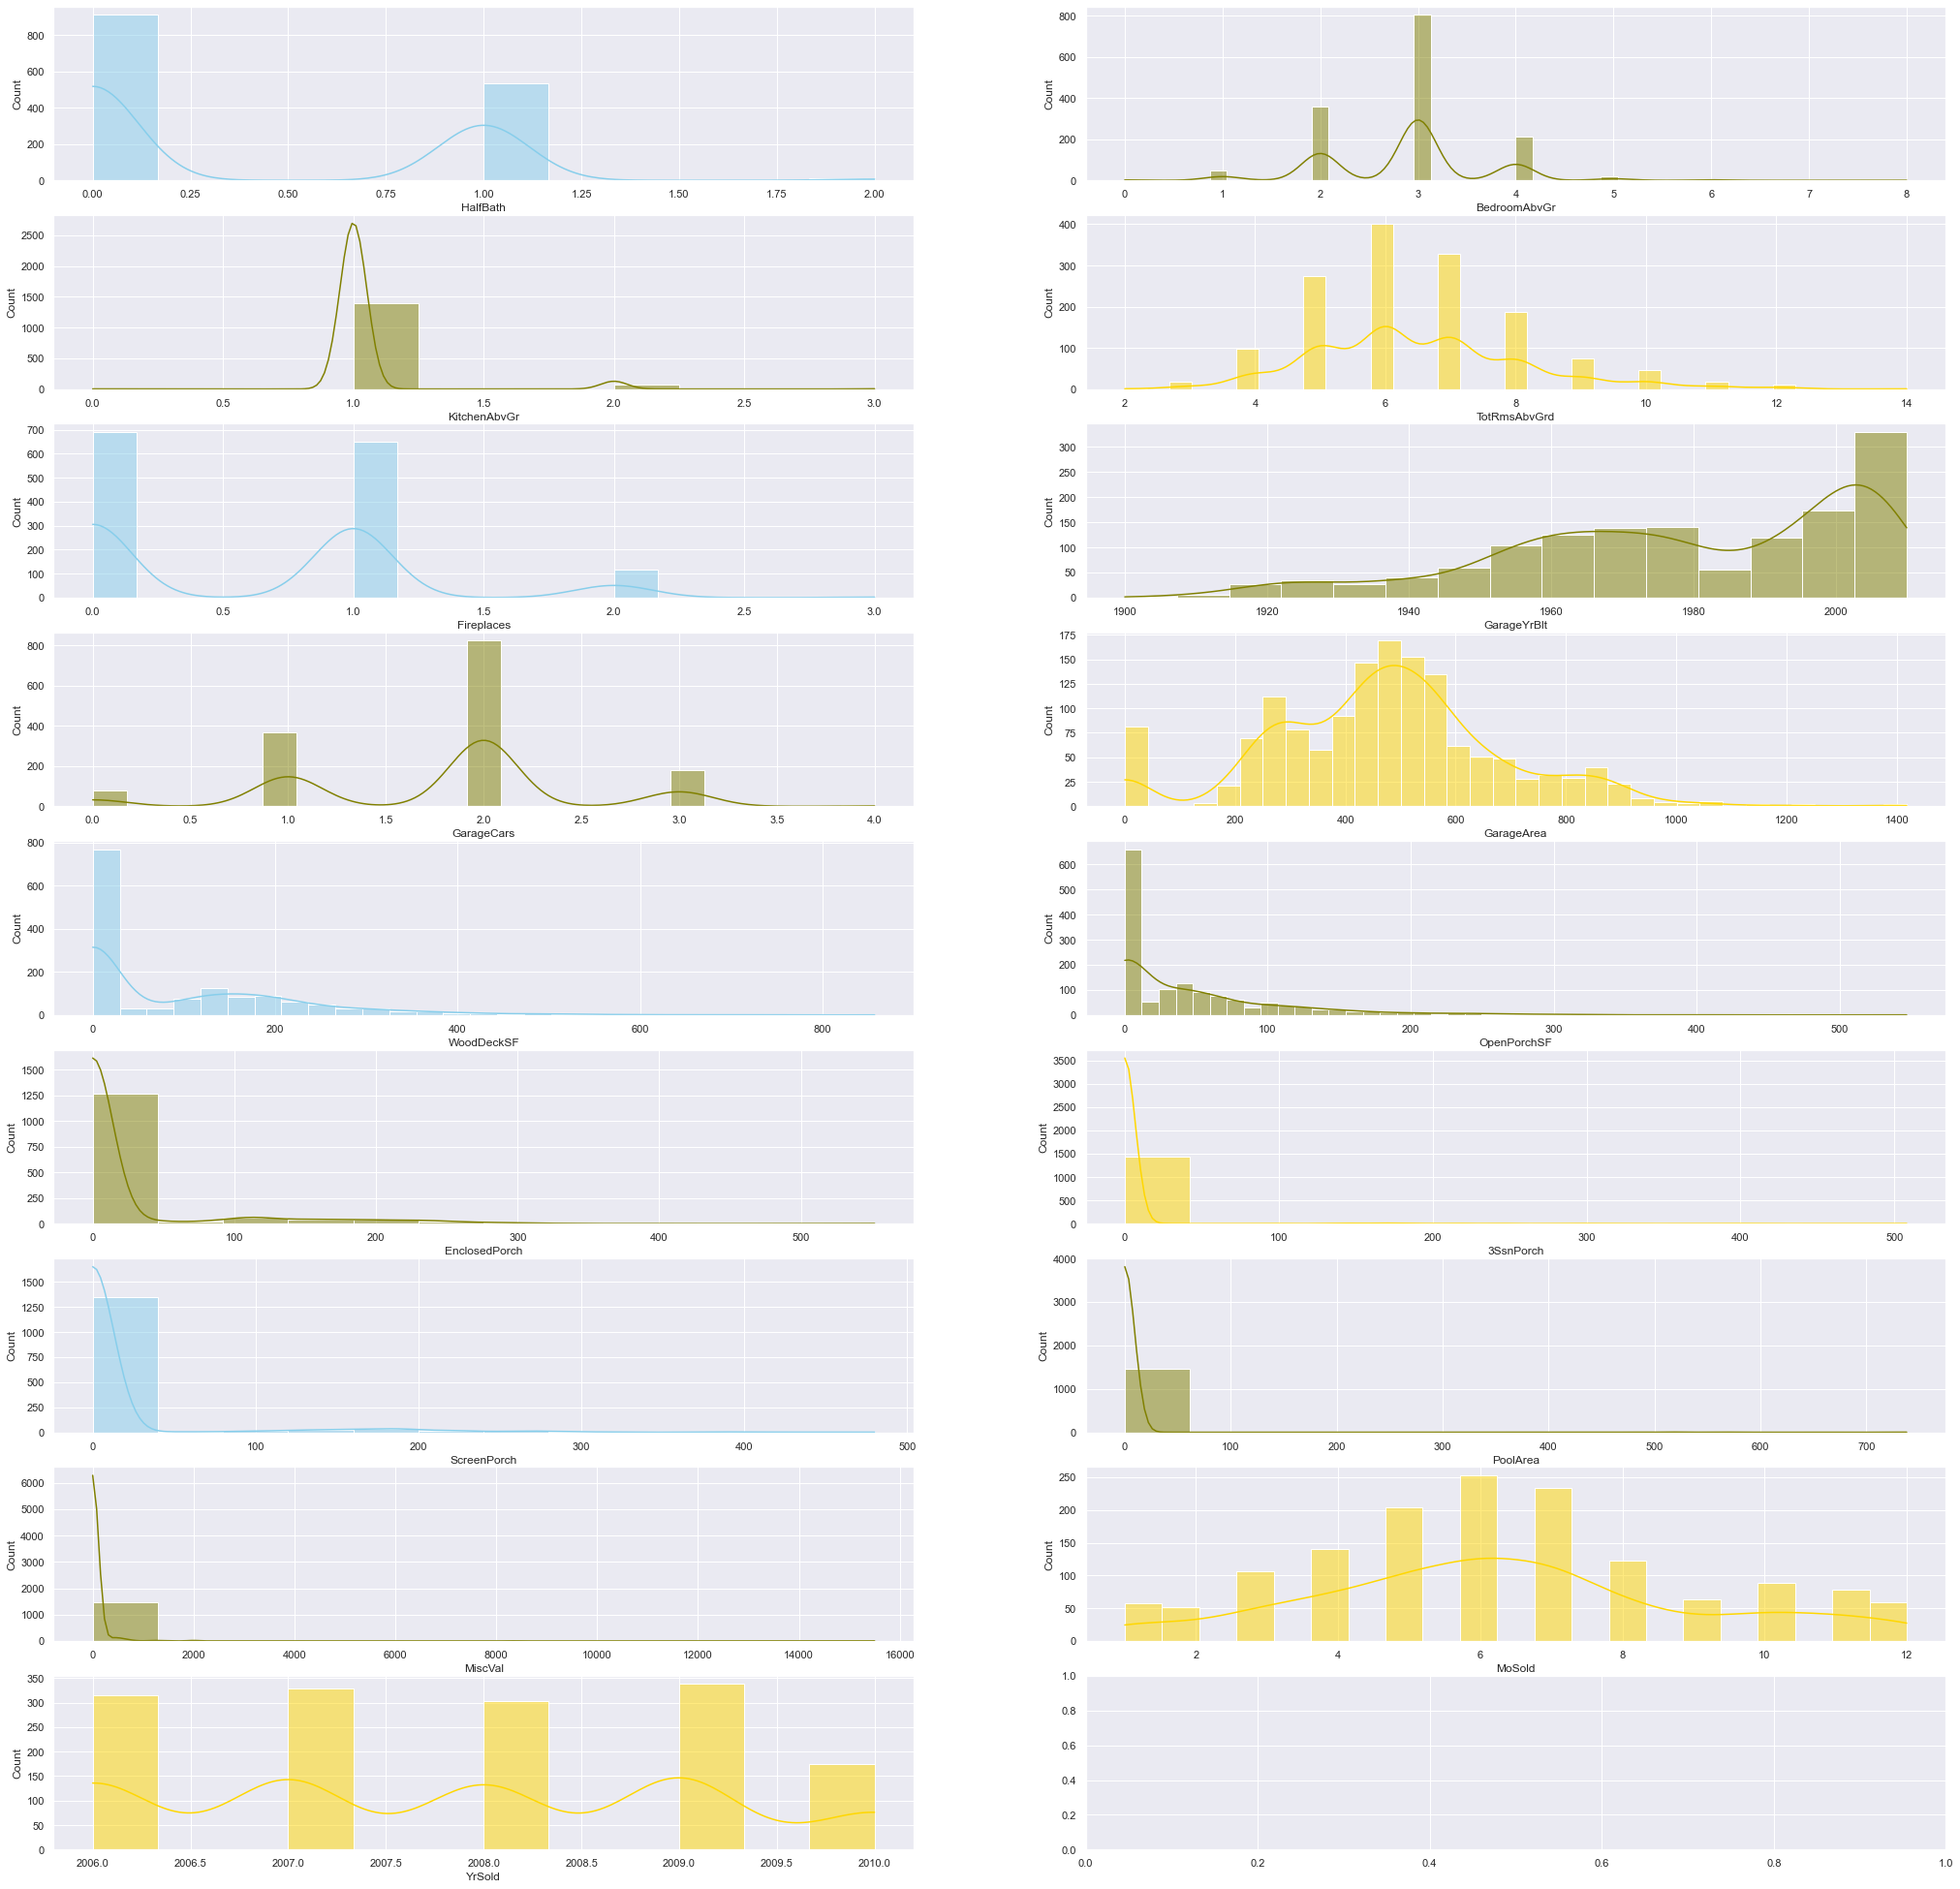

In [7]:
sns.set_theme(style="darkgrid")


fig, axs = plt.subplots(9, 2, figsize=(35, 35))

sns.histplot(data=df, x='HalfBath', kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="BedroomAbvGr", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="KitchenAbvGr", kde=True, color="olive", ax=axs[1, 0])
sns.histplot(data=df, x="TotRmsAbvGrd", kde=True, color="gold", ax=axs[1, 1])


sns.histplot(data=df, x='Fireplaces', kde=True, color="skyblue", ax=axs[2, 0])
sns.histplot(data=df, x="GarageYrBlt", kde=True, color="olive", ax=axs[2, 1])
sns.histplot(data=df, x="GarageCars", kde=True, color="olive", ax=axs[3, 0])
sns.histplot(data=df, x="GarageArea", kde=True, color="gold", ax=axs[3, 1])

sns.histplot(data=df, x='WoodDeckSF', kde=True, color="skyblue", ax=axs[4, 0])
sns.histplot(data=df, x="OpenPorchSF", kde=True, color="olive", ax=axs[4, 1])
sns.histplot(data=df, x="EnclosedPorch", kde=True, color="olive", ax=axs[5, 0])
sns.histplot(data=df, x="3SsnPorch", kde=True, color="gold", ax=axs[5, 1])

sns.histplot(data=df, x='ScreenPorch', kde=True, color="skyblue", ax=axs[6, 0])
sns.histplot(data=df, x="PoolArea", kde=True, color="olive", ax=axs[6, 1])
sns.histplot(data=df, x="MiscVal", kde=True, color="olive", ax=axs[7, 0])
sns.histplot(data=df, x="MoSold", kde=True, color="gold", ax=axs[7, 1])
sns.histplot(data=df, x="YrSold", kde=True, color="gold", ax=axs[8, 0])

<AxesSubplot:xlabel='OverallCond', ylabel='Count'>

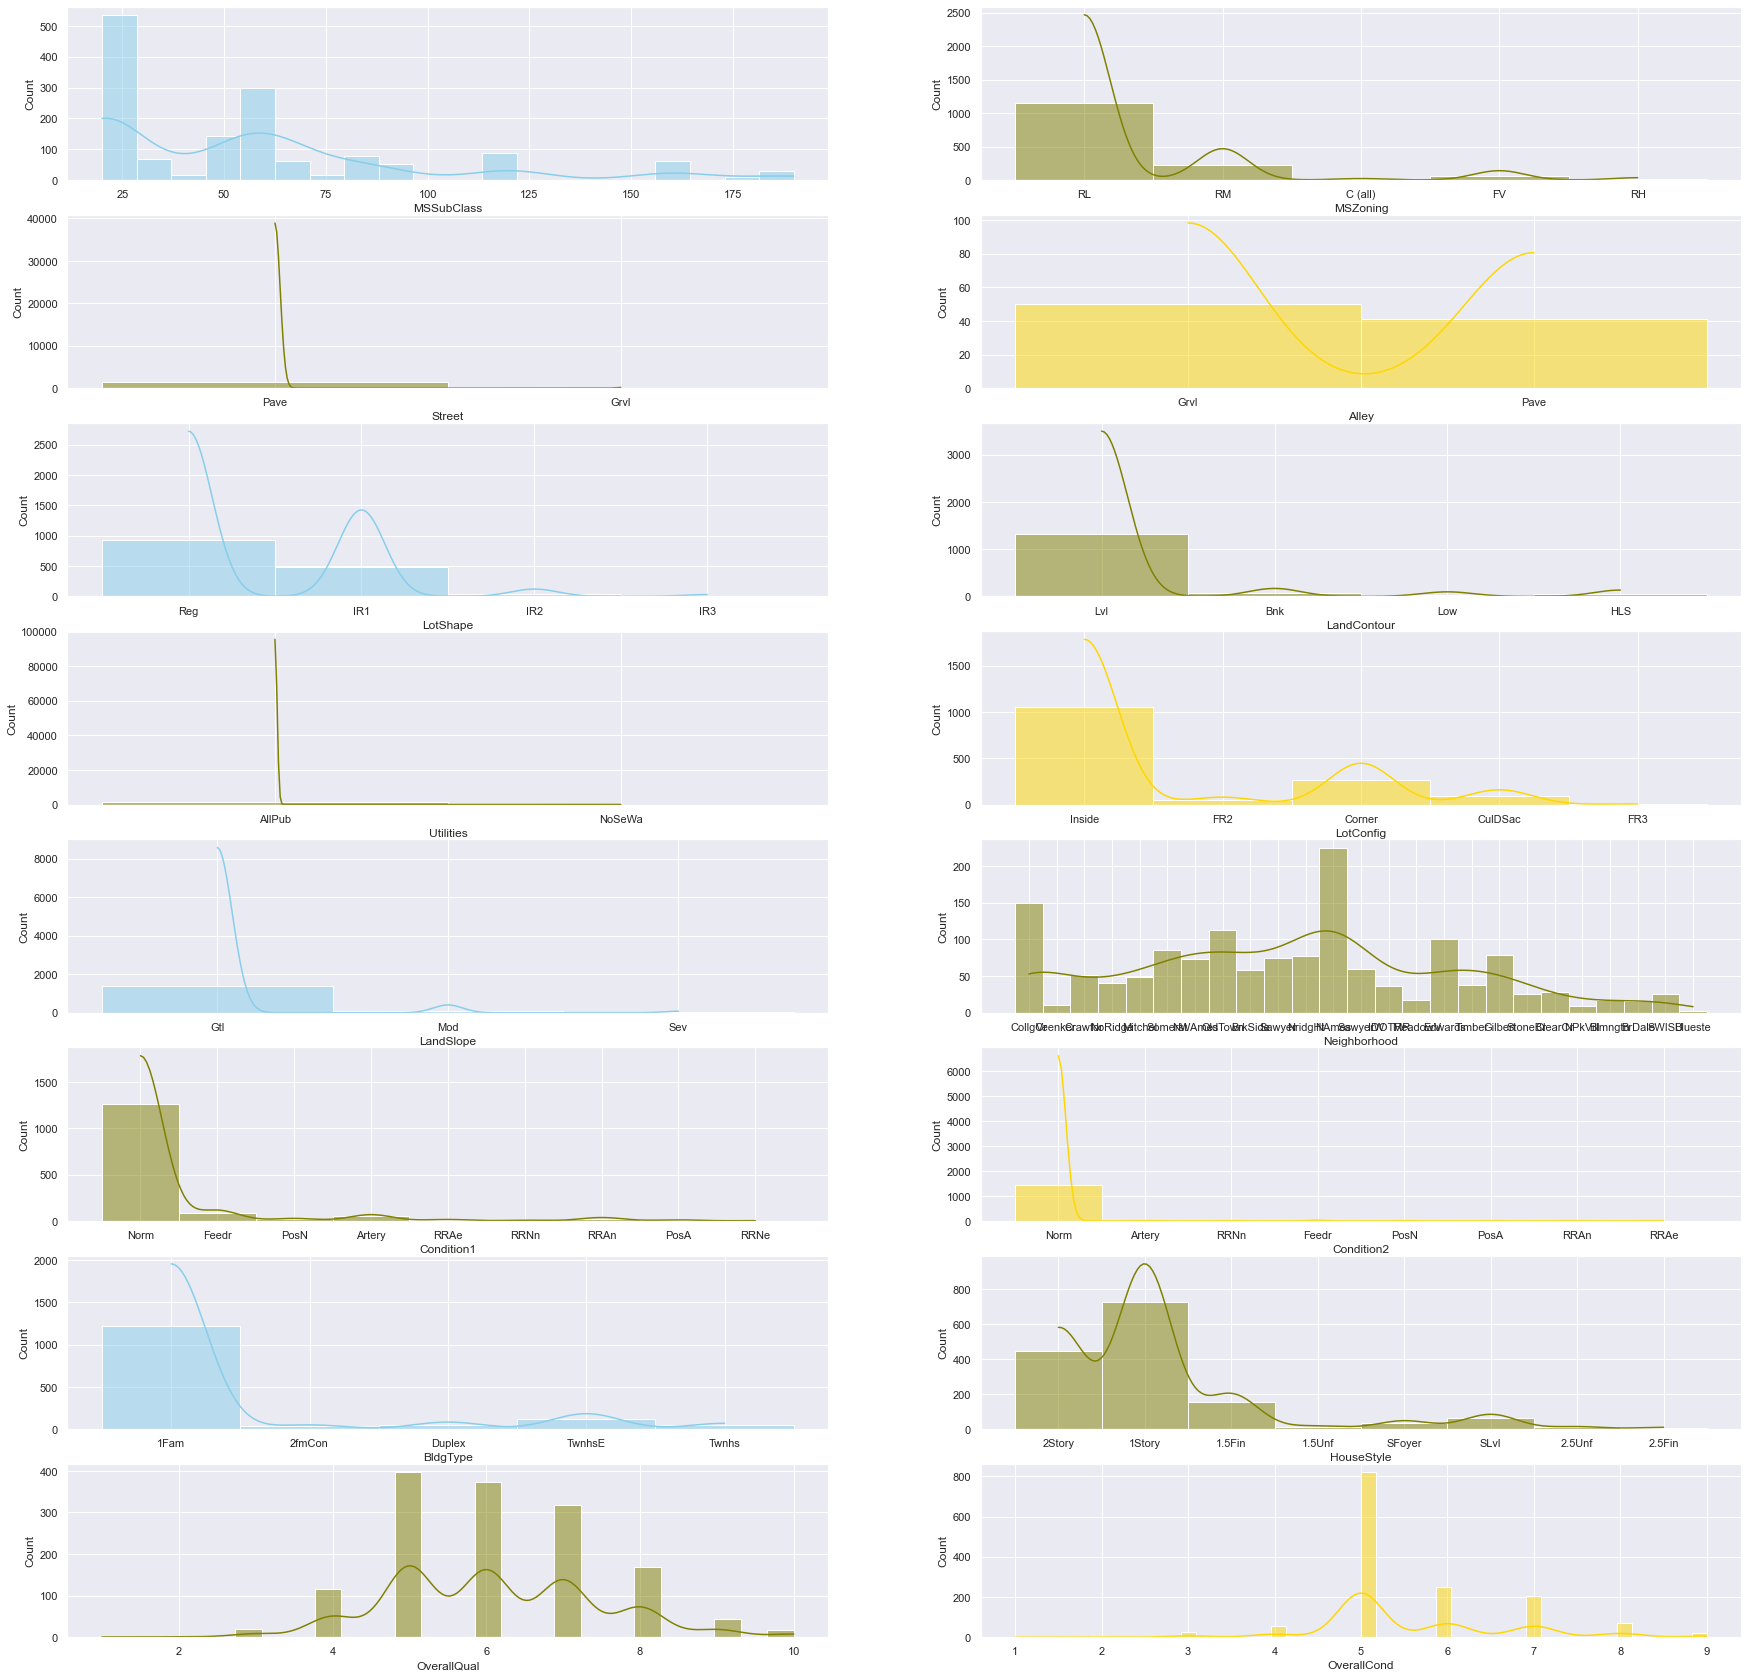

In [8]:
sns.set_theme(style="darkgrid")


fig, axs = plt.subplots(8, 2, figsize=(30, 30))

sns.histplot(data=df, x='MSSubClass', kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="MSZoning", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="Street", kde=True, color="olive", ax=axs[1, 0])
sns.histplot(data=df, x="Alley", kde=True, color="gold", ax=axs[1, 1])

sns.histplot(data=df, x='LotShape', kde=True, color="skyblue", ax=axs[2, 0])
sns.histplot(data=df, x="LandContour", kde=True, color="olive", ax=axs[2, 1])
sns.histplot(data=df, x="Utilities", kde=True, color="olive", ax=axs[3, 0])
sns.histplot(data=df, x="LotConfig", kde=True, color="gold", ax=axs[3, 1])

sns.histplot(data=df, x='LandSlope', kde=True, color="skyblue", ax=axs[4, 0])
sns.histplot(data=df, x="Neighborhood", kde=True, color="olive", ax=axs[4, 1])
sns.histplot(data=df, x="Condition1", kde=True, color="olive", ax=axs[5, 0])
sns.histplot(data=df, x="Condition2", kde=True, color="gold", ax=axs[5, 1])

sns.histplot(data=df, x='BldgType', kde=True, color="skyblue", ax=axs[6, 0])
sns.histplot(data=df, x="HouseStyle", kde=True, color="olive", ax=axs[6, 1])
sns.histplot(data=df, x="OverallQual", kde=True, color="olive", ax=axs[7, 0])
sns.histplot(data=df, x="OverallCond", kde=True, color="gold", ax=axs[7, 1])

### 2. Data cleaning

The variables 'MSSubClass', 'OverallQual', and 'OverallCond' have 'int' data types, but they are categorical and not numerical variables, so we will change the data type to 'object'.

In [9]:
df['MSSubClass'] = df['MSSubClass'].astype(object)
df['OverallQual'] = df['OverallQual'].astype(object)
df['OverallCond'] = df['OverallCond'].astype(object)

#### 2.1 Outliers Detection 

From the frequency plots, we can infer that there is presence of outliers in the dataset. However, we will not be treating them as we are not entirely sure if these exist because of some type of error or if they are valid data points. We might bias our analysis by removing or replacing the outliers in the data. 

#### 2.2 Duplicated rows

In [10]:
duplicate_rows = df.duplicated()
duplicate_rows.value_counts()

False    1460
dtype: int64

Results indicate no duplicated rows in the dataset.

#### 1.3 Null (missing) values identification

First, we will remove the target variable 'SalePrice', which is the variable we are trying to predict, from the dataframe.

In [11]:
# Create a dataframe 'y' with the sale prices
y = df['SalePrice']
df.drop('SalePrice', axis=1, inplace=True)

In [12]:
# Calculate quantity of null values
obj = df.isnull().sum()
for key,value in obj.iteritems():
    print(key,",",value)

Id , 0
MSSubClass , 0
MSZoning , 0
LotFrontage , 259
LotArea , 0
Street , 0
Alley , 1369
LotShape , 0
LandContour , 0
Utilities , 0
LotConfig , 0
LandSlope , 0
Neighborhood , 0
Condition1 , 0
Condition2 , 0
BldgType , 0
HouseStyle , 0
OverallQual , 0
OverallCond , 0
YearBuilt , 0
YearRemodAdd , 0
RoofStyle , 0
RoofMatl , 0
Exterior1st , 0
Exterior2nd , 0
MasVnrType , 8
MasVnrArea , 8
ExterQual , 0
ExterCond , 0
Foundation , 0
BsmtQual , 37
BsmtCond , 37
BsmtExposure , 38
BsmtFinType1 , 37
BsmtFinSF1 , 0
BsmtFinType2 , 38
BsmtFinSF2 , 0
BsmtUnfSF , 0
TotalBsmtSF , 0
Heating , 0
HeatingQC , 0
CentralAir , 0
Electrical , 1
1stFlrSF , 0
2ndFlrSF , 0
LowQualFinSF , 0
GrLivArea , 0
BsmtFullBath , 0
BsmtHalfBath , 0
FullBath , 0
HalfBath , 0
BedroomAbvGr , 0
KitchenAbvGr , 0
KitchenQual , 0
TotRmsAbvGrd , 0
Functional , 0
Fireplaces , 0
FireplaceQu , 690
GarageType , 81
GarageYrBlt , 81
GarageFinish , 81
GarageCars , 0
GarageArea , 0
GarageQual , 81
GarageCond , 81
PavedDrive , 0
WoodDeckSF ,

Some of the independent variables have a high number of missing values, e.g, 'Alley', 'PoolQC', 'Fence', and 'MiscFeature'. According to the data dictionary, 'NA' does not indicate these are missing values per se, but on the contrary, it denotes that these features are missing in that particular home. We will replace those NA values with 'No Alley', 'No pool', 'No fence', and 'No Miscellaneous Feature' respectively.

In [13]:
# Print columns with null values
df.columns[df.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

#### 1.4 Null values treatment

We will replace the null values with either the mean, median or mode. For quantitative variables, we use either the mean or the median. The Mean is used when the distribution is close to a normal one and the median when the distribution is positively or negatively skewed. 

When working with qualitative values, we will use the mode, i.e, the most frequent value for that particular variable.

For those variables that have 'NA' which denotes the absence of a home feature, we will replace the value 'NA' with 'No category' such as 'No Pool' or 'No Fence'.

In [14]:
# Replace NA values with 'No Alley'
df['Alley'].value_counts()
df['Alley'] = df['Alley'].fillna('No Alley')
df['Alley'].isnull().sum()

0

In [15]:
# Replace NA with median
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)
df['LotFrontage'].isnull().sum()

0

In [16]:
# Replace NA with 'None'
df['MasVnrType'].value_counts()
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrType'].isnull().sum()


0

In [17]:
# Replace NA with 'None'
df['MasVnrArea'] = df['MasVnrArea'].fillna('None')
df['MasVnrArea'].isnull().sum()

0

In [18]:
# Replace NA with 'No Basement'
df['BsmtQual'] = df['BsmtQual'].fillna('No Basement')
df['BsmtQual'].isnull().sum()

0

In [19]:
# Replace NA with 'No Basement'
df['BsmtCond'] = df['BsmtCond'].fillna('No Basement')
df['BsmtCond'].isnull().sum()

0

In [20]:
# Replace NA with 'No Basement'
df['BsmtExposure'] = df['BsmtExposure'].fillna('No Basement')
df['BsmtExposure'].isnull().sum()

0

In [21]:
# Replace NA with 'No Garage'
df['GarageType'] = df['GarageType'].fillna('No Garage')
df['GarageType'].isnull().sum()

0

In [22]:
# Replace NA with median
df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(), inplace=True)

In [23]:
# Replace NA with 'No Basement'
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('No Basement')
df['BsmtFinType1'].isnull().sum()

0

In [24]:
# Replace NA with 'No Basement'
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('No Basement')
df['BsmtFinType2'].isnull().sum()

0

In [25]:
# Replace NA with mode
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)
df['Electrical'].isnull().sum()

0

In [26]:
# Replace NA with 'No Fireplace'
df['FireplaceQu'] = df['FireplaceQu'].fillna('No Fireplace')
df['FireplaceQu'].isnull().sum()

0

In [27]:
# Replace NA with 'No Garage'
df['GarageQual'] = df['GarageQual'].fillna('No Garage')
df['GarageQual'].isnull().sum()

0

In [28]:
# Replace NA with 'No Garage'
df['GarageCond'] = df['GarageCond'].fillna('No Garage')
df['GarageCond'].isnull().sum()

0

In [29]:
# Replace NA with 'No Garage'
df['GarageFinish'] = df['GarageFinish'].fillna('No Garage')
df['GarageFinish'].isnull().sum()

0

In [30]:
# Replace NA with 'No Pool'
df['PoolQC'] = df['PoolQC'].fillna('No Pool')
df['PoolQC'].isnull().sum()

0

In [31]:
# Replace NA with 'No Fence'
df['Fence'] = df['Fence'].fillna('No Fence')
df['Fence'].isnull().sum()

0

In [32]:
# Replace NA with 'None'
df['MiscFeature'] = df['MiscFeature'].fillna('None')
df['MiscFeature'].isnull().sum()

0

In [33]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

In [35]:
# Identify null values in the 'MasVnrArea' variable
def isnot_float(x):
    try:
        float(x)
        return False
    except ValueError:
        return True

not_float = df.MasVnrArea.apply(isnot_float)
print(df.loc[not_float, "MasVnrArea"])

234     None
529     None
650     None
936     None
973     None
977     None
1243    None
1278    None
Name: MasVnrArea, dtype: object


In [36]:
# Replace NA with 'None'
df['MasVnrArea'].replace('None', 0, inplace=True)

In [37]:
# Change datatype to float
df = df.astype({"MasVnrArea":'float64'}) 

### 2. Data Exploration

We will split our dataset into 2 datasets, one including the categorical variables and another one with the numerical ones. The categorical variables will be transformed to numerical codes as input for our model.

In [38]:
df_num = df.select_dtypes(include={'int64','float'})
df_cat = df.select_dtypes(include='object')

In [39]:
df_cat.dtypes

MSSubClass       object
MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
OverallQual      object
OverallCond      object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC          

In [40]:
df_num

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,65.0,8450,2003,2003,196.0,706,0,150,856,...,548,0,61,0,0,0,0,0,2,2008
1,2,80.0,9600,1976,1976,0.0,978,0,284,1262,...,460,298,0,0,0,0,0,0,5,2007
2,3,68.0,11250,2001,2002,162.0,486,0,434,920,...,608,0,42,0,0,0,0,0,9,2008
3,4,60.0,9550,1915,1970,0.0,216,0,540,756,...,642,0,35,272,0,0,0,0,2,2006
4,5,84.0,14260,2000,2000,350.0,655,0,490,1145,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,62.0,7917,1999,2000,0.0,0,0,953,953,...,460,0,40,0,0,0,0,0,8,2007
1456,1457,85.0,13175,1978,1988,119.0,790,163,589,1542,...,500,349,0,0,0,0,0,0,2,2010
1457,1458,66.0,9042,1941,2006,0.0,275,0,877,1152,...,252,0,60,0,0,0,0,2500,5,2010
1458,1459,68.0,9717,1950,1996,0.0,49,1029,0,1078,...,240,366,0,112,0,0,0,0,4,2010


Before transforming the categories to codes, we will need to change every data type 'object' to 'category'.

In [41]:
df[df.select_dtypes(['object']).columns] = df.select_dtypes(['object']).apply(lambda x: x.astype('category'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   category
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1460 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   Alley          1460 non-null   category
 7   LotShape       1460 non-null   category
 8   LandContour    1460 non-null   category
 9   Utilities      1460 non-null   category
 10  LotConfig      1460 non-null   category
 11  LandSlope      1460 non-null   category
 12  Neighborhood   1460 non-null   category
 13  Condition1     1460 non-null   category
 14  Condition2     1460 non-null   category
 15  BldgType       1460 non-null   category
 16  HouseStyle     1460 non-null   category
 17  OverallQual    1460 non-null   ca

The categorical variables are transformed as follows.

In [42]:
df_cat_t = df.select_dtypes(include='category')

#### 2.1 Correlation Matrix

The correlation Matrix is a statistical tecnique used to evaluate the relationship between 2 variables. Multicollinearity occurs when variables are highly correlated in a regression model. When variables are correlated, changes in one variable will mean changes in the other variables. In a regression model, high correlation between independet variables prevents the model to estimate the relationship between the explanatory variables and the target variable in a precise way. Multicollinearity affects the coefficients in the regression as well as the p-values, i.e., how statistically significant each variable is.

<AxesSubplot:>

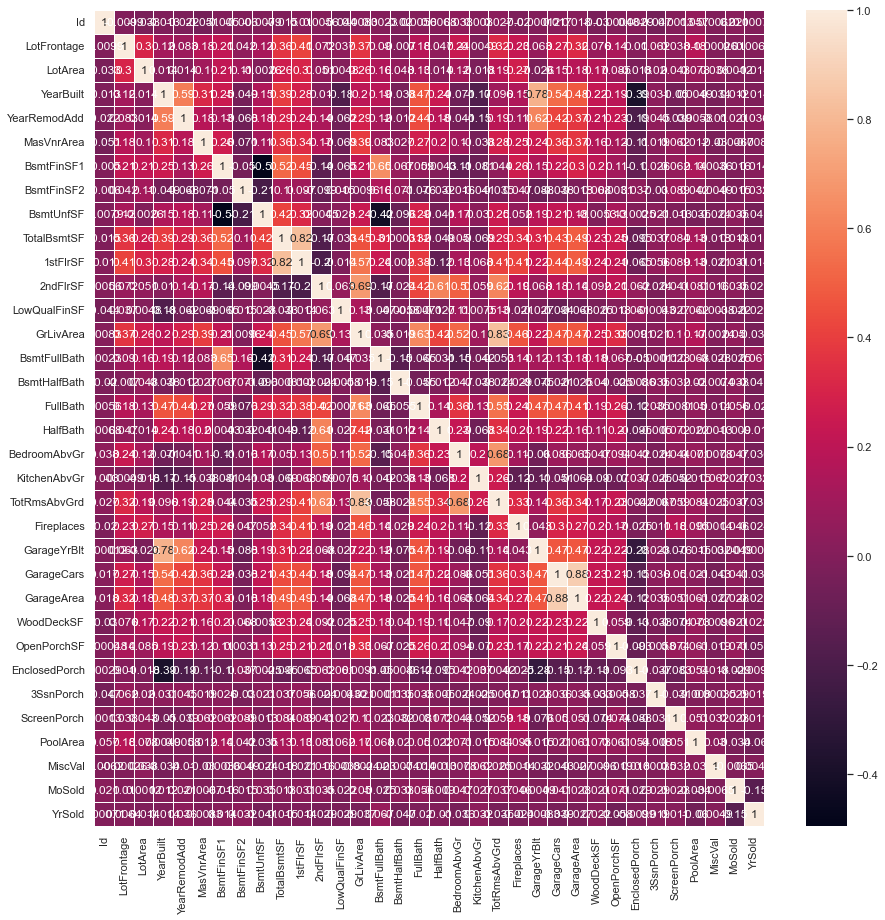

In [43]:
plt.subplots(figsize=(15,15))
sns.heatmap(df_num.corr(),annot=True,lw=1)

There is a strong correlation between variables 'GarageYrBlt' and 'YrBlt'. 'TotRmsAbvGrd' and 'GrLivArea' are highly correlated as well which makes sense as the more rooms a home has on a floor, the bigger the living area in that particular floor. Another set of highly correlated variables is 'GarageCars' and 'GarageArea' as the larger a garage area is the more cars it is able to fit. 

#### 3. Loading and cleaning the testing dataset

In [44]:
test = pd.read_csv(r'C:\Users\paowm\Downloads\test.csv')
# test.drop('Id', axis=1, inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [45]:
# Print number of nulls for each variable
obj = test.isnull().sum()
for key,value in obj.iteritems():
    print(key,",",value)

Id , 0
MSSubClass , 0
MSZoning , 4
LotFrontage , 227
LotArea , 0
Street , 0
Alley , 1352
LotShape , 0
LandContour , 0
Utilities , 2
LotConfig , 0
LandSlope , 0
Neighborhood , 0
Condition1 , 0
Condition2 , 0
BldgType , 0
HouseStyle , 0
OverallQual , 0
OverallCond , 0
YearBuilt , 0
YearRemodAdd , 0
RoofStyle , 0
RoofMatl , 0
Exterior1st , 1
Exterior2nd , 1
MasVnrType , 16
MasVnrArea , 15
ExterQual , 0
ExterCond , 0
Foundation , 0
BsmtQual , 44
BsmtCond , 45
BsmtExposure , 44
BsmtFinType1 , 42
BsmtFinSF1 , 1
BsmtFinType2 , 42
BsmtFinSF2 , 1
BsmtUnfSF , 1
TotalBsmtSF , 1
Heating , 0
HeatingQC , 0
CentralAir , 0
Electrical , 0
1stFlrSF , 0
2ndFlrSF , 0
LowQualFinSF , 0
GrLivArea , 0
BsmtFullBath , 2
BsmtHalfBath , 2
FullBath , 0
HalfBath , 0
BedroomAbvGr , 0
KitchenAbvGr , 0
KitchenQual , 1
TotRmsAbvGrd , 0
Functional , 2
Fireplaces , 0
FireplaceQu , 730
GarageType , 76
GarageYrBlt , 78
GarageFinish , 78
GarageCars , 1
GarageArea , 1
GarageQual , 78
GarageCond , 78
PavedDrive , 0
WoodDeckSF

In [46]:
test.columns[test.isnull().any()]

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='object')

We will check the distributions for each of the categorical variables to study the frequency of the data points. This will also help us find the best method to treat null values.

<AxesSubplot:xlabel='FullBath', ylabel='Count'>

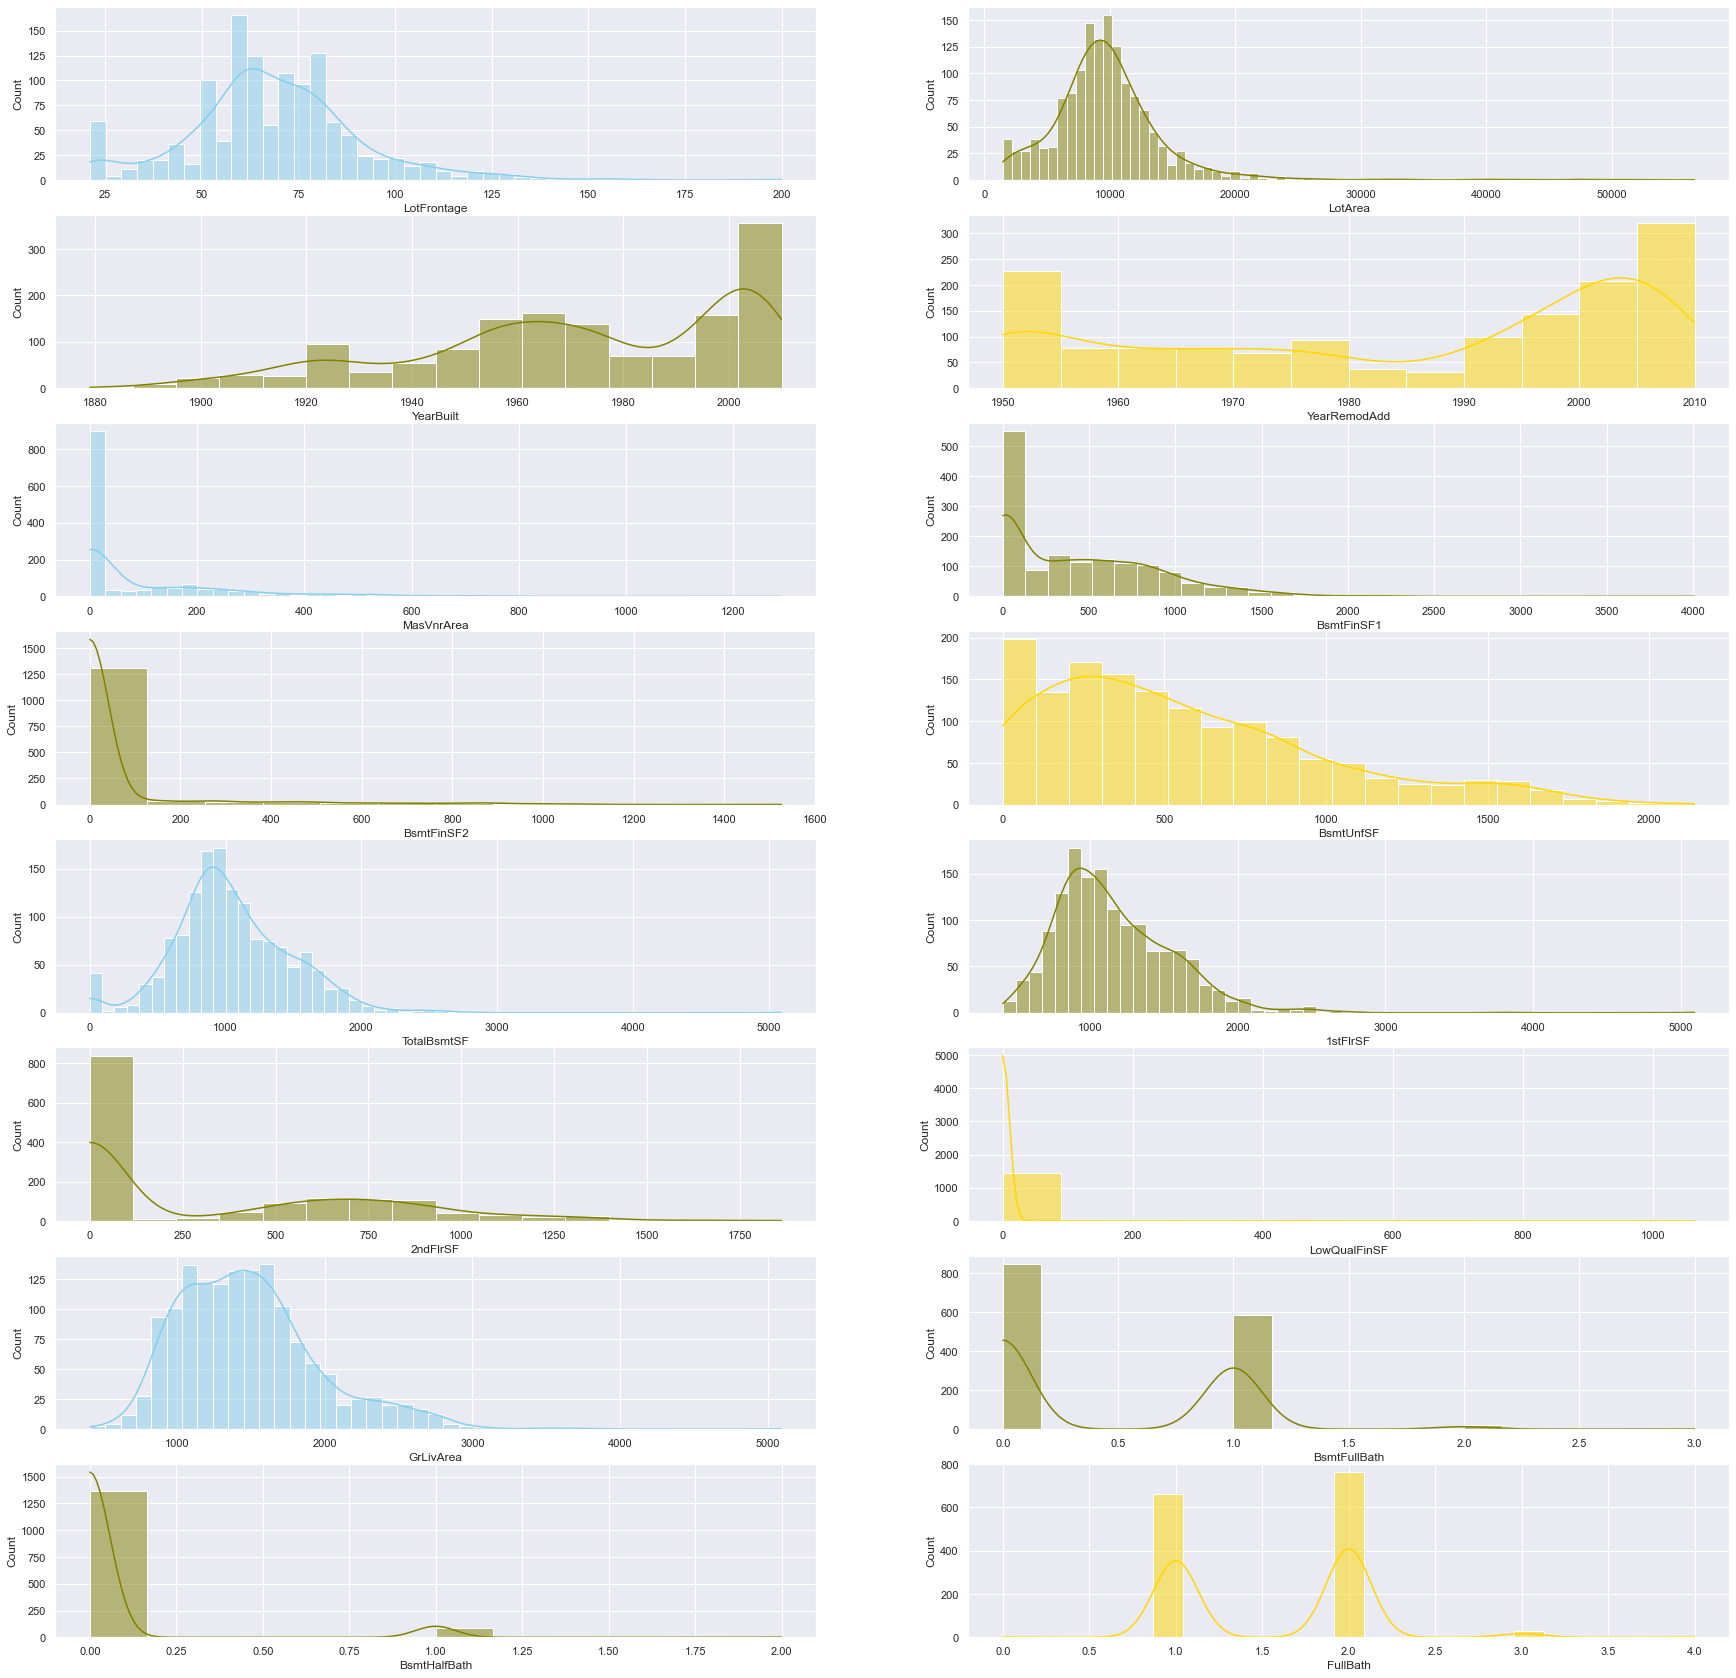

In [47]:
sns.set_theme(style="darkgrid")


fig, axs = plt.subplots(8, 2, figsize=(30, 30))

sns.histplot(data=test, x='LotFrontage', kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=test, x="LotArea", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=test, x="YearBuilt", kde=True, color="olive", ax=axs[1, 0])
sns.histplot(data=test, x="YearRemodAdd", kde=True, color="gold", ax=axs[1, 1])


sns.histplot(data=test, x='MasVnrArea', kde=True, color="skyblue", ax=axs[2, 0])
sns.histplot(data=test, x="BsmtFinSF2", kde=True, color="olive", ax=axs[3, 0])
sns.histplot(data=test, x="BsmtFinSF1", kde=True, color="olive", ax=axs[2, 1])
sns.histplot(data=test, x="BsmtUnfSF", kde=True, color="gold", ax=axs[3, 1])

sns.histplot(data=test, x='TotalBsmtSF', kde=True, color="skyblue", ax=axs[4, 0])
sns.histplot(data=test, x="1stFlrSF", kde=True, color="olive", ax=axs[4, 1])
sns.histplot(data=test, x="2ndFlrSF", kde=True, color="olive", ax=axs[5, 0])
sns.histplot(data=test, x="LowQualFinSF", kde=True, color="gold", ax=axs[5, 1])

sns.histplot(data=test, x='GrLivArea', kde=True, color="skyblue", ax=axs[6, 0])
sns.histplot(data=test, x="BsmtFullBath", kde=True, color="olive", ax=axs[6, 1])
sns.histplot(data=test, x="BsmtHalfBath", kde=True, color="olive", ax=axs[7, 0])
sns.histplot(data=test, x="FullBath", kde=True, color="gold", ax=axs[7, 1])

<AxesSubplot:xlabel='YrSold', ylabel='Count'>

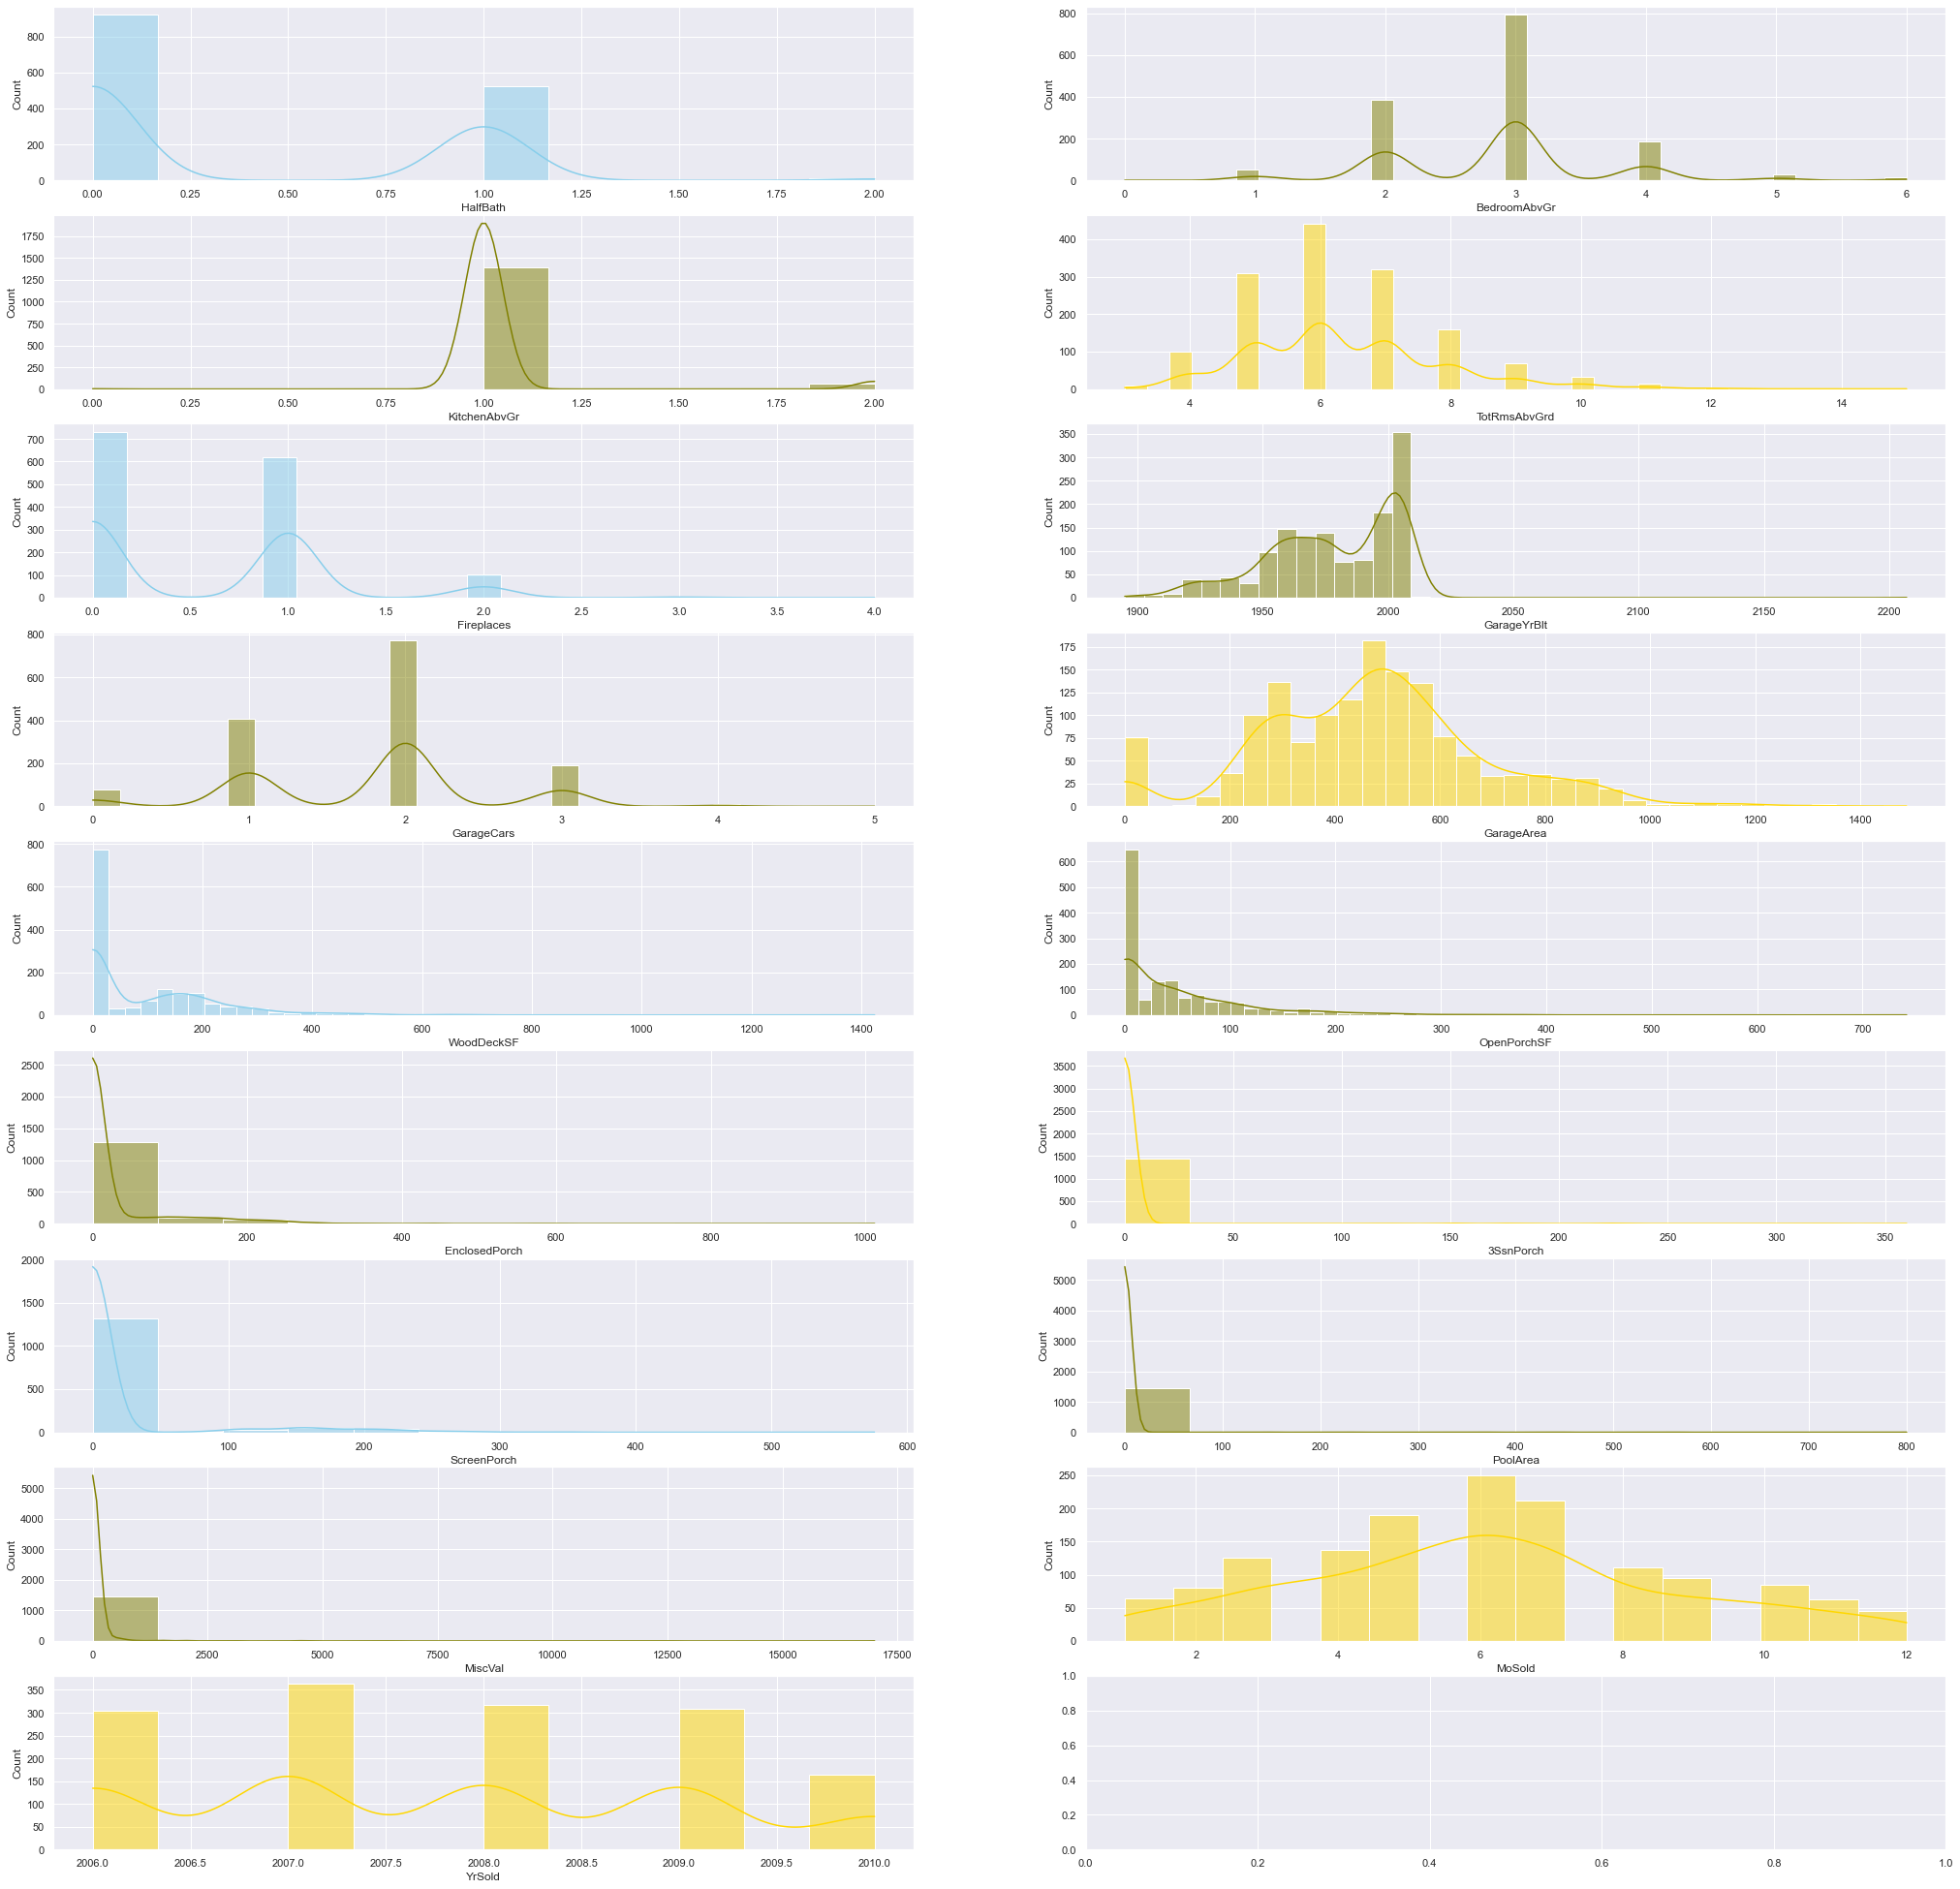

In [48]:
sns.set_theme(style="darkgrid")


fig, axs = plt.subplots(9, 2, figsize=(35, 35))

sns.histplot(data=test, x='HalfBath', kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=test, x="BedroomAbvGr", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=test, x="KitchenAbvGr", kde=True, color="olive", ax=axs[1, 0])
sns.histplot(data=test, x="TotRmsAbvGrd", kde=True, color="gold", ax=axs[1, 1])


sns.histplot(data=test, x='Fireplaces', kde=True, color="skyblue", ax=axs[2, 0])
sns.histplot(data=test, x="GarageYrBlt", kde=True, color="olive", ax=axs[2, 1])
sns.histplot(data=test, x="GarageCars", kde=True, color="olive", ax=axs[3, 0])
sns.histplot(data=test, x="GarageArea", kde=True, color="gold", ax=axs[3, 1])

sns.histplot(data=test, x='WoodDeckSF', kde=True, color="skyblue", ax=axs[4, 0])
sns.histplot(data=test, x="OpenPorchSF", kde=True, color="olive", ax=axs[4, 1])
sns.histplot(data=test, x="EnclosedPorch", kde=True, color="olive", ax=axs[5, 0])
sns.histplot(data=test, x="3SsnPorch", kde=True, color="gold", ax=axs[5, 1])

sns.histplot(data=test, x='ScreenPorch', kde=True, color="skyblue", ax=axs[6, 0])
sns.histplot(data=test, x="PoolArea", kde=True, color="olive", ax=axs[6, 1])
sns.histplot(data=test, x="MiscVal", kde=True, color="olive", ax=axs[7, 0])
sns.histplot(data=test, x="MoSold", kde=True, color="gold", ax=axs[7, 1])
sns.histplot(data=test, x="YrSold", kde=True, color="gold", ax=axs[8, 0])

<AxesSubplot:xlabel='OverallCond', ylabel='Count'>

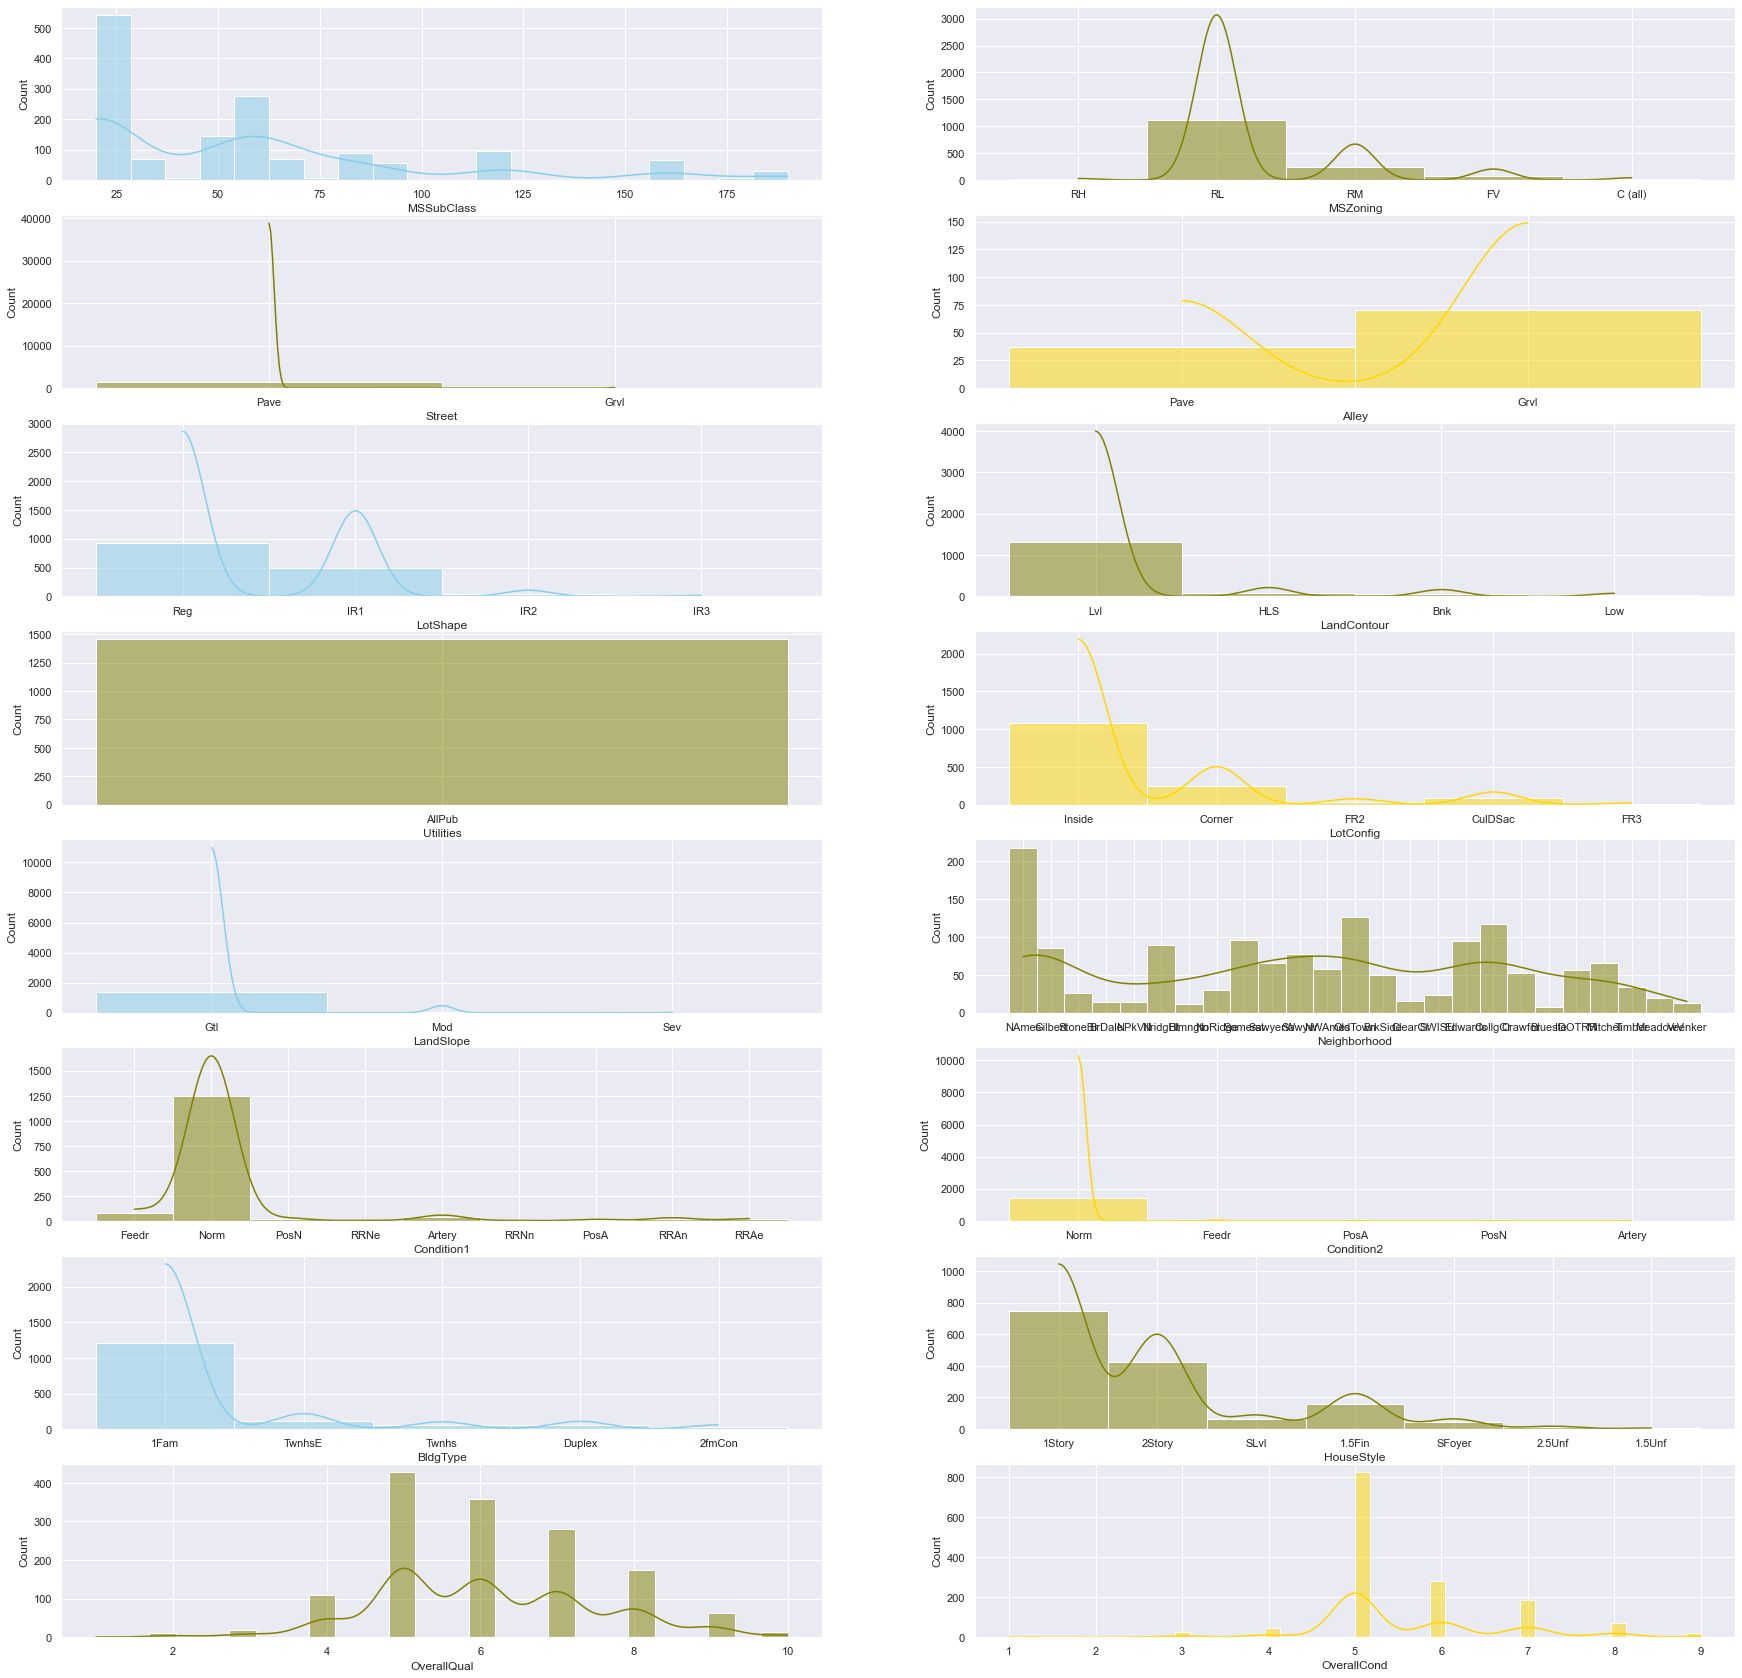

In [49]:
sns.set_theme(style="darkgrid")


fig, axs = plt.subplots(8, 2, figsize=(30, 30))

sns.histplot(data=test, x='MSSubClass', kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=test, x="MSZoning", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=test, x="Street", kde=True, color="olive", ax=axs[1, 0])
sns.histplot(data=test, x="Alley", kde=True, color="gold", ax=axs[1, 1])

sns.histplot(data=test, x='LotShape', kde=True, color="skyblue", ax=axs[2, 0])
sns.histplot(data=test, x="LandContour", kde=True, color="olive", ax=axs[2, 1])
sns.histplot(data=test, x="Utilities", kde=True, color="olive", ax=axs[3, 0])
sns.histplot(data=test, x="LotConfig", kde=True, color="gold", ax=axs[3, 1])

sns.histplot(data=test, x='LandSlope', kde=True, color="skyblue", ax=axs[4, 0])
sns.histplot(data=test, x="Neighborhood", kde=True, color="olive", ax=axs[4, 1])
sns.histplot(data=test, x="Condition1", kde=True, color="olive", ax=axs[5, 0])
sns.histplot(data=test, x="Condition2", kde=True, color="gold", ax=axs[5, 1])

sns.histplot(data=test, x='BldgType', kde=True, color="skyblue", ax=axs[6, 0])
sns.histplot(data=test, x="HouseStyle", kde=True, color="olive", ax=axs[6, 1])
sns.histplot(data=test, x="OverallQual", kde=True, color="olive", ax=axs[7, 0])
sns.histplot(data=test, x="OverallCond", kde=True, color="gold", ax=axs[7, 1])

#### 3.2 Identification of missing values

In [50]:
# Check for misisng values in the test dataset
obj = test.isnull().sum()
for key,value in obj.iteritems():
    print(key,",",value)

Id , 0
MSSubClass , 0
MSZoning , 4
LotFrontage , 227
LotArea , 0
Street , 0
Alley , 1352
LotShape , 0
LandContour , 0
Utilities , 2
LotConfig , 0
LandSlope , 0
Neighborhood , 0
Condition1 , 0
Condition2 , 0
BldgType , 0
HouseStyle , 0
OverallQual , 0
OverallCond , 0
YearBuilt , 0
YearRemodAdd , 0
RoofStyle , 0
RoofMatl , 0
Exterior1st , 1
Exterior2nd , 1
MasVnrType , 16
MasVnrArea , 15
ExterQual , 0
ExterCond , 0
Foundation , 0
BsmtQual , 44
BsmtCond , 45
BsmtExposure , 44
BsmtFinType1 , 42
BsmtFinSF1 , 1
BsmtFinType2 , 42
BsmtFinSF2 , 1
BsmtUnfSF , 1
TotalBsmtSF , 1
Heating , 0
HeatingQC , 0
CentralAir , 0
Electrical , 0
1stFlrSF , 0
2ndFlrSF , 0
LowQualFinSF , 0
GrLivArea , 0
BsmtFullBath , 2
BsmtHalfBath , 2
FullBath , 0
HalfBath , 0
BedroomAbvGr , 0
KitchenAbvGr , 0
KitchenQual , 1
TotRmsAbvGrd , 0
Functional , 2
Fireplaces , 0
FireplaceQu , 730
GarageType , 76
GarageYrBlt , 78
GarageFinish , 78
GarageCars , 1
GarageArea , 1
GarageQual , 78
GarageCond , 78
PavedDrive , 0
WoodDeckSF

In [51]:
# Columns that have missing values
test.columns[test.isnull().any()]

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='object')

Now that we have which variables have missing values, we will go ahead and decide which value we will be replacing them with.

#### 3.3 Null values treatment

In [52]:
# Replace NA with mode
test['MSZoning'].fillna(test['MSZoning'].mode()[0], inplace=True)
test['MSZoning'].isnull().sum()

0

In [53]:
# Check if we replaced the NA
nulls = test.loc[test['MSZoning'].isnull()]
nulls

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


In [54]:
# Replace NA with median
test['LotFrontage'].fillna(test['LotFrontage'].median(), inplace=True)
test['LotFrontage'].isnull().sum()

0

In [55]:
# Replace NA with 'No Alley'
test['Alley'] = test['Alley'].fillna('No Alley')
test['Alley'].isnull().sum()

0

In [56]:
# Replace NA with mode
test['Utilities'].value_counts()
test['Utilities'].fillna(test['Utilities'].mode()[0], inplace=True)
test['Utilities'].isnull().sum()

0

In [57]:
# Replace NA with mode
test['Exterior1st'].fillna(test['Exterior1st'].mode()[0], inplace=True)
test['Exterior1st'].isnull().sum()

0

In [58]:
# Replace NA with mode
test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0], inplace=True)
test['Exterior2nd'].isnull().sum()

0

In [59]:
# Replace NA with mode
test['MasVnrType'].fillna(test['MasVnrType'].mode()[0], inplace=True)
test['MasVnrType'].isnull().sum()

0

In [60]:
# Replace NA with median
test['MasVnrArea'].fillna(test['MasVnrArea'].median(), inplace=True)

In [61]:
# Replace NA with 'No Basement'
test['BsmtQual'] = test['BsmtQual'].fillna('No Basement')
test['BsmtQual'].isnull().sum()

0

In [62]:
# Replace NA with 'No Basement'
test['BsmtCond'] = test['BsmtCond'].fillna('No Basement')

In [63]:
# Replace NA with 'No Basement'
test['BsmtExposure'] = test['BsmtExposure'].fillna('No Basement')

In [64]:
# Replace NA with 'No Basement'
test['BsmtFinType1'] = test['BsmtFinType1'].fillna('No Basement')

In [65]:
# Replace NA with median
test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].median(), inplace=True)

In [66]:
# Replace NA with 'No Basement'
test['BsmtFinType2'] = test['BsmtFinType2'].fillna('No Basement')

In [67]:
# Replace NA with median
test['BsmtFinSF2'].fillna(test['BsmtFinSF2'].median(), inplace=True)

In [68]:
# Replace NA with median
test['BsmtUnfSF'].fillna(test['BsmtUnfSF'].median(), inplace=True)

In [69]:
# Replace NA with median
test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].median(), inplace=True)

In [70]:
# Replace NA with median
test['BsmtFullBath'].fillna(test['BsmtFullBath'].median(), inplace=True)

In [71]:
# Replace NA with median
test['BsmtHalfBath'].fillna(test['BsmtHalfBath'].median(), inplace=True)

In [72]:
# Replace NA with mode
test['KitchenQual'].fillna(test['KitchenQual'].mode()[0], inplace=True)

In [73]:
# Replace NA with mode
test['Functional'].fillna(test['Functional'].mode()[0], inplace=True)

In [74]:
# Replace NA with 'No Fireplace'
test['FireplaceQu'] = test['FireplaceQu'].fillna('No Fireplace')

In [75]:
# Replace NA with 'No Garage'
test['GarageType'] = test['GarageType'].fillna('No Garage')

In [76]:
# Replace NA with median
test['GarageYrBlt'].fillna(test['GarageYrBlt'].median(), inplace=True)

In [77]:
# Replace NA with 'No Garage'
test['GarageFinish'] = test['GarageFinish'].fillna('No Garage')

In [78]:
# Replace NA with median
test['GarageCars'].fillna(test['GarageCars'].median(), inplace=True)

In [79]:
# Replace NA with median
test['GarageArea'].fillna(test['GarageArea'].median(), inplace=True)

In [80]:
# Replace NA with 'No Garage'
test['GarageQual'] = test['GarageQual'].fillna('No Garage')

In [81]:
# Replace NA with 'No Garage'
test['GarageCond'] = test['GarageCond'].fillna('No Garage')

In [82]:
# Replace NA with 'No Pool'
test['PoolQC'] = test['PoolQC'].fillna('No Pool')

In [83]:
# Replace NA with 'No Pool'
test['Fence'] = test['Fence'].fillna('No Pool')

In [84]:
# Replace NA with 'No Feature'
test['MiscFeature'] = test['MiscFeature'].fillna('No Feature')

In [85]:
# Replace NA with mode
test['SaleType'].fillna(test['SaleType'].mode()[0], inplace=True)

In [86]:
# Check if NA values were all replaced
test.columns[test.isnull().any()]

Index([], dtype='object')

### Data Preparation

In [89]:
# Convert object data type variables to category
test[test.select_dtypes(['object']).columns] = test.select_dtypes(['object']).apply(lambda x: x.astype('category'))
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1459 non-null   int64   
 1   MSSubClass     1459 non-null   int64   
 2   MSZoning       1459 non-null   category
 3   LotFrontage    1459 non-null   float64 
 4   LotArea        1459 non-null   int64   
 5   Street         1459 non-null   category
 6   Alley          1459 non-null   category
 7   LotShape       1459 non-null   category
 8   LandContour    1459 non-null   category
 9   Utilities      1459 non-null   category
 10  LotConfig      1459 non-null   category
 11  LandSlope      1459 non-null   category
 12  Neighborhood   1459 non-null   category
 13  Condition1     1459 non-null   category
 14  Condition2     1459 non-null   category
 15  BldgType       1459 non-null   category
 16  HouseStyle     1459 non-null   category
 17  OverallQual    1459 non-null   in

In [90]:
# Join train and test datasets
combined_df = pd.concat([df, test], ignore_index=True)
# Add the source_df variable to the DataFrame which denotes which dataset the record belongs to
combined_df["source_df"] = [name for name, _ in [("df", df), ("test", test)] for _ in range(len(_))]
combined_df.drop('Id', axis=1, inplace=True)

In [91]:
# Apply get_dummies method to the combined_df dataset
X = pd.get_dummies(data=combined_df, drop_first=True)
# Create a new dataframe that groups by source_df_tes
restored_dfs = {name: group.drop("source_df_test", axis=1) for name, group in X.groupby("source_df_test")}

We are splitting the dataset into train and test datasets to run our model.

In [92]:
# Create X_train dataset
X_train = restored_dfs[0]
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1456,20,85.0,13175,6,6,1978,1988,119.0,790.0,163.0,...,0,0,0,0,1,0,0,0,1,0
1457,70,66.0,9042,7,9,1941,2006,0.0,275.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1458,20,68.0,9717,5,6,1950,1996,0.0,49.0,1029.0,...,0,0,0,0,1,0,0,0,1,0


In [93]:
# Create X_test dataset
X_test = restored_dfs[1]
X_test

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1460,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,0,1,0,0,0,1,0
1461,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1462,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1463,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1464,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2915,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,0,0,1,0,0,0,0,0
2916,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,0,0,1,0,0,0,0,0
2917,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,0,0,1,0,0,0,1,0


#### 4. Linear Regression Model

A Linear Regression model will allow us to predict the Sale Price which is a quantitative variable. It will also calculate the coefficients for each of the variables. The coefficients determine the relationship between the independent variables and the dependent variable.

In [94]:
# Create the linear regression model
model = LinearRegression()
model.fit(X_train,y)

LinearRegression()

In [95]:
print(model.intercept_)

-578541.3356347505


### 5. Results

The coefficient parameters are shown below. These are the values that multiply the independent variables in the equation and are an estimation of the change in the mean response per unit increase in X when the rest of the predictors are constant. If a coefficient has a positive sign then as the predictor variable increases the target variable increases. On the contrary, if the coefficient has a negative sign, when the predictor variable increases the target variable decreases.

In [96]:
coeff_parameter = pd.DataFrame(model.coef_,X_train.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
MSSubClass,-55.007634
LotFrontage,42.962489
LotArea,0.704230
OverallQual,6772.954137
OverallCond,5799.526565
...,...
SaleCondition_AdjLand,9585.899805
SaleCondition_Alloca,841.324339
SaleCondition_Family,741.650333
SaleCondition_Normal,6694.533147


The 'SalePrice' predicted values can be seen below. These are the target variable values for the testing dataset.

In [97]:
predictions = model.predict(X_test)
predictions

array([110470.03069442, 150647.5108812 , 184389.53161111, ...,
       168105.22043074, 115237.81823597, 212314.74312384])

#### OLS Regression

In [98]:
# Run the ols model with our dataset to show entire results
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     67.27
Date:                Wed, 28 Aug 2024   Prob (F-statistic):               0.00
Time:                        14:07:30   Log-Likelihood:                -16568.
No. Observations:                1460   AIC:                         3.364e+04
Df Residuals:                    1208   BIC:                         3.497e+04
Df Model:                         251                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

After fitting our model, we got a R-squared of 0.93 or that 93% of the observed variation can be explained by our model. Usually, the larger the R-squared the better the model fits the data. However, R-squared cannot tells us whether the coeffcient estimates and predictions are biased. Therefore, we need to check the residuals plot.

#### Residuals

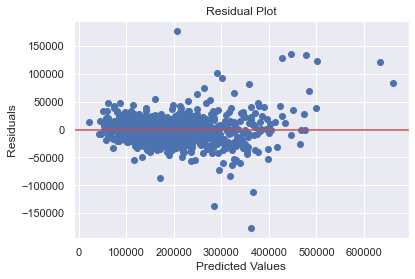

In [99]:
residuals = ls.resid
# Create the residual plot
plt.scatter(ls.fittedvalues, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Residual Plot")
plt.show()

The residual plot shows the residuals are randomly distributed around 0 and there is no evident pattern, therefore our model provides a decent fit to the data. However, there are some outliers shown on the plot. These can be removed or not depending on what SMEs decide. With these results, we have concluded our regression model analysis.


### 6. Further analysis

Further analysis may include studying and treating multicollinearity between independent variables. We can do this by using the Variance Inflation Factor and removing those variables that have VIFs values larger than 5, one at a time and then recalculating VIF every time a variables is removed. 

Also, we noticed the presence of outliers in the residual plot. Outliers can pull the line closer to themselves which can result in a high SSE for the rest of the data and a increase in variance. We could treat outliers by replacing them with the maximum or minimum limit or removing them if it is a possibility. SMEs and stakeholders can help decide what to be done with these outliers.